In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [2]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()


,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
df_airline.dropna(axis=0,inplace=True)

In [5]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [6]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [7]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


<AxesSubplot:>

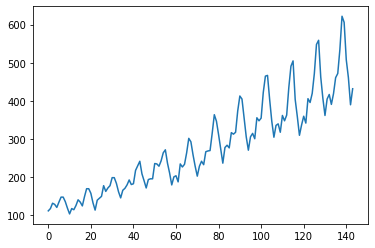

In [8]:
df_airline['Thousands of Passengers'].plot()

In [10]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [11]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [14]:
df_airline.tail()

,Month,Thousands of Passengers
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [16]:
df_airline['date']=df_airline['Month']

In [32]:
df_airline=df_airline.drop('Month',axis=1)

In [34]:
df_airline['first_diff']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [35]:
df_airline.columns

Index(['Thousands of Passengers', 'date', 'first_diff'], dtype='object')

<AxesSubplot:>

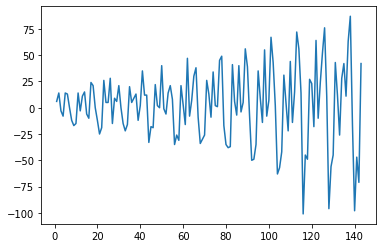

In [37]:
df_airline.first_diff.plot()

In [38]:
def adf_test(series):
    result=adfuller(series)
    print('ADF statistics: {}'.format(result[0]))
    print('p-value:{}'.format(result[1]))
    if result[1]<=0.05:
        print("Reject null hypothesis .Hence stationary series")
    else:
        print("Accept null hyp.HEnce non stationary series")

In [40]:
from statsmodels.tsa.stattools import adfuller

In [41]:
adf_test(df_airline['Thousands of Passengers'])

ADF statistics: 0.8153688792060482
p-value:0.991880243437641
Accept null hyp.HEnce non stationary series


<AxesSubplot:>

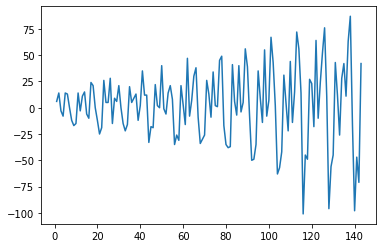

In [46]:
df_airline['first_diff'][1:].plot()

In [47]:
adf_test(df_airline['first_diff'][1:])

ADF statistics: -2.8292668241699994
p-value:0.0542132902838255
Accept null hyp.HEnce non stationary series


In [48]:
df_airline['second_diff']=df_airline['first_diff']-df_airline['first_diff'].shift(1)

In [49]:
df_airline.columns

Index(['Thousands of Passengers', 'date', 'first_diff', 'second_diff'], dtype='object')

In [50]:
adf_test(df_airline['second_diff'][2:])

ADF statistics: -16.384231542468505
p-value:2.7328918500142407e-29
Reject null hypothesis .Hence stationary series


In [69]:
# Let's create a data frame for transformation from time series to supervised:

def built_supervised(data):
    supervised_df = data.copy()

    # Create column for each lag:
    for i in range(1, 13):
        col_name = 'lag_' + str(i)
        supervised_df[col_name] = supervised_df['second_diff'].shift(i)

    # Drop null values:
    supervised_df = supervised_df.dropna().reset_index(drop=True)

    #supervised_df.to_csv('./model_df.csv', index=False)
    
    return supervised_df

In [70]:
model_df = built_supervised(df_airline)
model_df .tail()

,Thousands of Passengers,date,first_diff,second_diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
125,606.0,1960-08-01,-16.0,-103.0,24.0,52.0,-31.0,14.0,54.0,-38.0,-31.0,88.0,11.0,40.0,-107.0,-65.0
126,508.0,1960-09-01,-98.0,-82.0,-103.0,24.0,52.0,-31.0,14.0,54.0,-38.0,-31.0,88.0,11.0,40.0,-107.0
127,461.0,1960-10-01,-47.0,51.0,-82.0,-103.0,24.0,52.0,-31.0,14.0,54.0,-38.0,-31.0,88.0,11.0,40.0
128,390.0,1960-11-01,-71.0,-24.0,51.0,-82.0,-103.0,24.0,52.0,-31.0,14.0,54.0,-38.0,-31.0,88.0,11.0
129,432.0,1960-12-01,42.0,113.0,-24.0,51.0,-82.0,-103.0,24.0,52.0,-31.0,14.0,54.0,-38.0,-31.0,88.0


In [90]:
model_df['sales']=model_df['Thousands of Passengers']

In [92]:
model_df=model_df.drop('Thousands of Passengers',axis=1)

In [93]:
model_df.head()

,date,first_diff,second_diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,sales
0,1950-03-01,15.0,4.0,14.0,-17.0,29.0,2.0,-5.0,-12.0,-13.0,-1.0,22.0,-5.0,-17.0,8.0,141.0
1,1950-04-01,-6.0,-21.0,4.0,14.0,-17.0,29.0,2.0,-5.0,-12.0,-13.0,-1.0,22.0,-5.0,-17.0,135.0
2,1950-05-01,-10.0,-4.0,-21.0,4.0,14.0,-17.0,29.0,2.0,-5.0,-12.0,-13.0,-1.0,22.0,-5.0,125.0
3,1950-06-01,24.0,34.0,-4.0,-21.0,4.0,14.0,-17.0,29.0,2.0,-5.0,-12.0,-13.0,-1.0,22.0,149.0
4,1950-07-01,21.0,-3.0,34.0,-4.0,-21.0,4.0,14.0,-17.0,29.0,2.0,-5.0,-12.0,-13.0,-1.0,170.0


In [94]:
#train test split
def train_test_split(data):
    data=data.drop(['sales',"first_diff",'date'],axis=1)
    train,test=data[:-12].values,data[-12:].values
    
    return train,test

train,test=train_test_split(model_df)


In [95]:
train.shape

(118, 13)

In [97]:
test.shape

(12, 13)

In [98]:
train[1]

array([-21.,   4.,  14., -17.,  29.,   2.,  -5., -12., -13.,  -1.,  22.,
        -5., -17.])

In [99]:
train.shape[1]

13

In [100]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#scaling the data
def scale_data(train_set,test_set):
    scaler=MinMaxScaler(feature_range=(-1,1))
    scaler=scaler.fit(train_set)
    
    # Reshape training set:
    train_set = train_set.reshape(train_set.shape[0],
                                  train_set.shape[1])
    train_set_scaled = scaler.transform(train_set)
    
    # Reshape test set:
    test_set = test_set.reshape(test_set.shape[0], 
                                test_set.shape[1])
    test_set_scaled = scaler.transform(test_set)
    
    X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1].ravel() # returns the array, flattened!
    X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1].ravel()
    
    return X_train, y_train, X_test, y_test, scaler


X_train, y_train, X_test, y_test, scaler_object = scale_data(train, test)
print(f"Shape of X Train: {X_train.shape}\nShape of y Train: {y_train.shape}\nShape of X Test: {X_test.shape}\nShape of y Test: {y_test.shape}")

Shape of X Train: (118, 12)
Shape of y Train: (118,)
Shape of X Test: (12, 12)
Shape of y Test: (12,)


In [101]:
def re_scaling(y_pred, x_test, scaler_obj, lstm=False):
    """For visualizing and comparing results, undoes the scaling effect on predictions."""
   # y_pred: model predictions
   # x_test: features from the test set used for predictions
   # scaler_obj: the scaler objects used for min-max scaling
   # lstm: indicate if the model run is the lstm. If True, additional transformation occurs 
    
    # Reshape y_pred:
    y_pred = y_pred.reshape(y_pred.shape[0],
                            1,
                            1)

    if not lstm:
        x_test = x_test.reshape(x_test.shape[0],
                                1, 
                                x_test.shape[1])

    # Rebuild test set for inverse transform:
    pred_test_set = []
    for index in range(0, len(y_pred)):
        pred_test_set.append(np.concatenate([y_pred[index], 
                                             x_test[index]],
                                             axis=1) )

    # Reshape pred_test_set:
    pred_test_set = np.array(pred_test_set)
    pred_test_set = pred_test_set.reshape(pred_test_set.shape[0],
                                          pred_test_set.shape[2])

    # Inverse transform:
    pred_test_set_inverted = scaler_obj.inverse_transform(pred_test_set)

    return pred_test_set_inverted
    

In [102]:
def prediction_df(unscale_predictions, origin_df):
    """Generates a dataframe that shows the predicted sales for each month
    for plotting results."""
    
    # unscale_predictions: the model predictions that do not have min-max or other scaling applied
    # origin_df: the original monthly sales dataframe
    
    # Create dataframe that shows the predicted sales:
    result_list = []
    sales_dates = list(origin_df[-13:].date)
    act_sales = list(origin_df[-13:].sales)

    for index in range(0, len(unscale_predictions)):
        result_dict = {}
        result_dict['pred_value'] = int(unscale_predictions[index][0] + act_sales[index])
        result_dict['date'] = sales_dates[index + 1]
        result_list.append(result_dict)

    df_result = pd.DataFrame(result_list)

    return df_result

In [103]:
model_scores = {}

def get_scores(unscale_df, origin_df, model_name):
    """Prints the root mean squared error, mean absolute error, and r2 scores
    for each model. Saves all results in a model_scores dictionary for
    comparison."""
    
    rmse = np.sqrt(mean_squared_error(origin_df.sales[-12:], 
                                      unscale_df.pred_value[-12:]))
    
    mae = mean_absolute_error(origin_df.sales[-12:], 
                              unscale_df.pred_value[-12:])
    
    r2 = r2_score(origin_df.sales[-12:], 
                  unscale_df.pred_value[-12:])
    
    model_scores[model_name] = [rmse, mae, r2]

    print(f"RMSE: {rmse}\nMAE: {mae}\nR2 Score: {r2}")

In [104]:
def plot_results(results, origin_df, model_name):
# results: a dataframe with unscaled predictions

    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(origin_df.date, origin_df.sales, data=origin_df, ax=ax, 
                 label='Original', color='blue')
    sns.lineplot(results.date, results.pred_value, data=results, ax=ax, 
                 label='Predicted', color='red')
    
    
    ax.set(xlabel = "Date",
           ylabel = "Sales",
           title = f"{model_name} Sales Forecasting Prediction")
    
    ax.legend(loc='best')
    
   # filepath = Path('./model_output/{model_name}_forecasting.svg')  
   # filepath.parent.mkdir(parents=True, exist_ok=True) 
   # plt.savefig(f'./model_output/{model_name}_forecasting.svg')

In [105]:
def regressive_model(train_data, test_data, model, model_name):
    """Runs regressive models in SKlearn framework. First calls scale_data
    to split into X and y and scale the data. Then fits and predicts. Finally,
    predictions are unscaled, scores are printed, and results are plotted and
    saved."""
    
    # Split into X & y and scale data:
    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data,
                                                                 test_data)

    # Run sklearn models:
    mod = model
    mod.fit(X_train, y_train)
    predictions = mod.predict(X_test) # y_pred=predictions

    # Undo scaling to compare predictions against original data:
    origin_df = m_df
    unscaled = re_scaling(predictions, X_test, scaler_object) # unscaled_predictions
    unscaled_df = prediction_df(unscaled, origin_df)

    # Print scores and plot results:
    get_scores(unscaled_df, origin_df, model_name)
    plot_results(unscaled_df, origin_df, model_name)

In [106]:
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from keras_ordered_neurons import ONLSTM
from sklearn.linear_model import LinearRegression

In [107]:
model_df.columns

Index(['date', 'first_diff', 'second_diff', 'lag_1', 'lag_2', 'lag_3', 'lag_4',
       'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', 'lag_11',
       'lag_12', 'sales'],
      dtype='object')

In [108]:
m_df=model_df[['sales','date']]

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from time import time

import warnings
warnings.filterwarnings("ignore")

RMSE: 54.74410166097044
MAE: 49.583333333333336
R2 Score: 0.45898877249637704


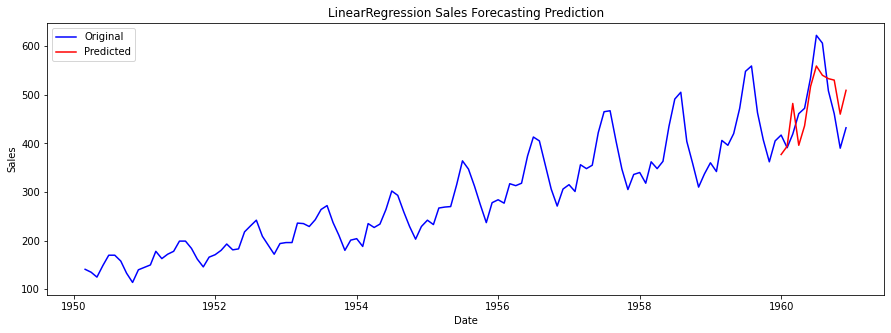

In [111]:
regressive_model(train, test, LinearRegression(), 'LinearRegression')

RMSE: 50.14645218424397
MAE: 40.333333333333336
R2 Score: 0.5460458025985228


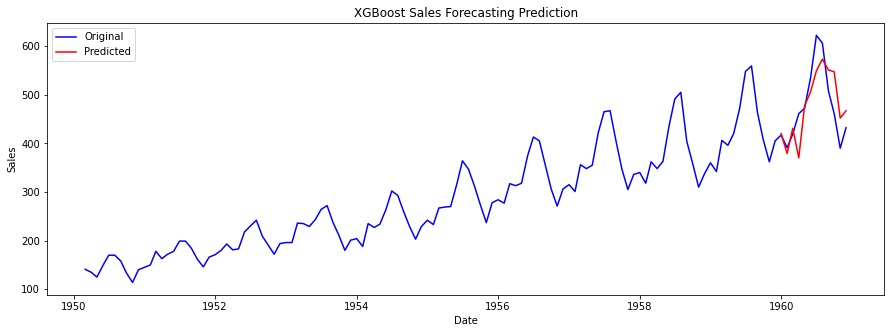

In [112]:
regressive_model(train, test, XGBRegressor(n_estimators=100,max_depth=3, 
                                           learning_rate=0.2,objective='reg:squarederror'), 'XGBoost')

RMSE: 53.45091205957107
MAE: 42.0
R2 Score: 0.4842468947603312


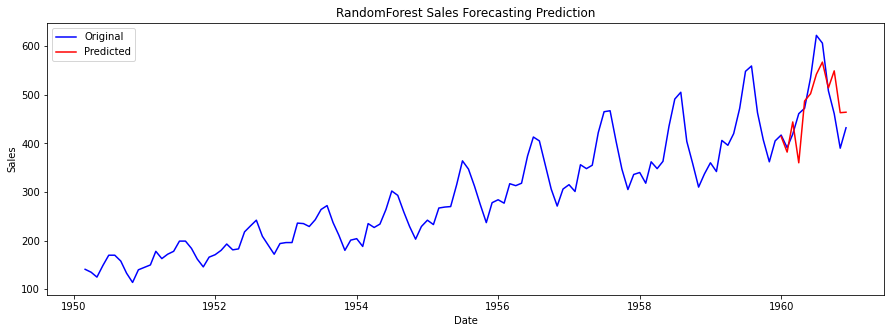

In [113]:
regressive_model(train, test, RandomForestRegressor(n_estimators=100, max_depth=20), 
          'RandomForest')

In [114]:
# ARIMA Model:

import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse


import pickle
import warnings

In [116]:
df_airline.head()

,Thousands of Passengers,date,first_diff,second_diff
0,112.0,1949-01-01,NaN,NaN
1,118.0,1949-02-01,6.0,NaN
2,132.0,1949-03-01,14.0,8.0
3,129.0,1949-04-01,-3.0,-17.0
4,121.0,1949-05-01,-8.0,-5.0


In [117]:
df_airline['sales']=df_airline['Thousands of Passengers']

In [118]:
df_airline=df_airline.drop('Thousands of Passengers',axis=1)

In [119]:
df_airline.head()

,date,first_diff,second_diff,sales
0,1949-01-01,NaN,NaN,112.0
1,1949-02-01,6.0,NaN,118.0
2,1949-03-01,14.0,8.0,132.0
3,1949-04-01,-3.0,-17.0,129.0
4,1949-05-01,-8.0,-5.0,121.0


In [120]:
df_airline.index=df_airline.date

In [133]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         144 non-null    datetime64[ns]
 1   first_diff   143 non-null    float64       
 2   second_diff  142 non-null    float64       
 3   sales        144 non-null    float64       
 4   pred_value   61 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 6.8 KB


In [132]:
df_airline.second_diff[-12:]

date
1960-01-01    -31.0
1960-02-01    -38.0
1960-03-01     54.0
1960-04-01     14.0
1960-05-01    -31.0
1960-06-01     52.0
1960-07-01     24.0
1960-08-01   -103.0
1960-09-01    -82.0
1960-10-01     51.0
1960-11-01    -24.0
1960-12-01    113.0
Name: second_diff, dtype: float64

In [179]:
def sarimax_model(data):
    # Model:
    sar = sm.tsa.statespace.SARIMAX(data.second_diff, order=(12, 0, 0),
                                    seasonal_order=(0, 1, 0, 12),
                                    trend='c').fit()
    
    # Generate predictions:
    start, end, dynamic = 100, 144, 1
    data['pred_value'] = sar.predict(start=start, end=end, dynamic=dynamic)
    pred_df = data.pred_value[start+dynamic:end]
    
    data[["second_diff","pred_value"]].plot(color=['blue', 'Red'])
    plt.legend(loc='upper left')
    
    model_score = {}
    rmse = np.sqrt(mean_squared_error(data.second_diff[-43:], data.pred_value[-43:]))
    mae = mean_absolute_error(data.second_diff[-43:], data.pred_value[-43:])
    r2 = r2_score(data.second_diff[-43:], data.pred_value[-43:])
    model_scores['ARIMA'] = [rmse, mae, r2]
    
    print(f"RMSE: {rmse}\nMAE: {mae}\nR2 Score: {r2}")
    
    return sar, data, pred_df

RMSE: 31.895353106936934
MAE: 23.69747428936772
R2 Score: 0.68213689860149


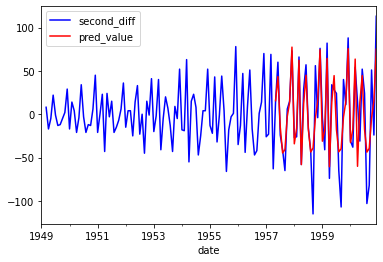

In [180]:
sar, datatime_df, predictions = sarimax_model(df_airline)

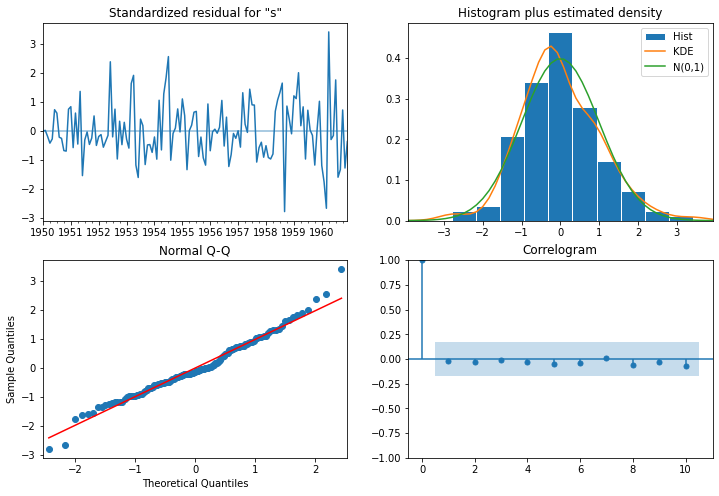

In [181]:
sar.plot_diagnostics(figsize=(12, 8));